Feature descriptions: https://datasf.gitbook.io/datasf-dataset-explainers/police-department-stop-data

# IEOR 142 Final Project: Predicting if an SF Traffic Stop Will Result in a Search

In [ ]:
import pandas as pd

def load_csv(file_path):
    return pd.read_csv(file_path)

file_path = 'Police_Department_Stop_Data_20240502.csv'
traffic_stop = load_csv(file_path)
traffic_stop 

/tmp/ipykernel_563/2707113390.py:5: DtypeWarning: Columns (6,14,40,41,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,doj_record_id,person_number,unique_identifier,stop_data_record_status,lea_record_id,agency_ori,nfia_flag,stop_datetime,duration_of_stop,is_stop_response_to_call,...,perceived_or_known_disability_code,reason_for_stop_code,traffic_violation_type_code,actions_taken_code,basis_for_search_code,basis_for_property_seizure_code,type_of_property_seized_code,contraband_or_evidence_code,suspicion_sub_type_code,results_of_stop_code
0,U380119326E22D6100AC,5.0,U380119326E22D6100AC_5,Completed - Successful Submission,NaN,CA0380100,NaN,2019/11/22 08:33:00 AM,120,N,...,8,4.0,NaN,"4,5,6,18,20,21,22","2,3,9,10",3,"1,11","2,11",NaN,4
1,U3801223400D4887116B,1.0,U3801223400D4887116B_1,Completed - Successful Submission,NaN,CA0380100,NaN,2022/12/05 11:59:00 PM,60,Y,...,8,2.0,NaN,"5,8,21",NaN,1,1,1,"2,3",1
2,U380121054B6A404E1D6,1.0,U380121054B6A404E1D6_1,Completed - Successful Submission,NaN,CA0380100,NaN,2021/02/23 12:00:00 PM,30,N,...,8,1.0,1.0,"5,18,21",4,"1,3","4,6,10,11","5,7",NaN,6
3,U380118193C7D32D472B,1.0,U380118193C7D32D472B_1,Completed - Successful Submission,NaN,CA0380100,NaN,2018/07/12 07:04:00 AM,76,N,...,8,2.0,NaN,"8,18,20,21",3,3,11,11,9,1
4,U38012029453C383DF7A,1.0,U38012029453C383DF7A_1,Completed - Successful Submission,NaN,CA0380100,NaN,2020/10/20 09:56:00 AM,25,Y,...,8,2.0,NaN,"4,5,18,20,21",10,1,11,1,"2,3",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250088,U3801194890300BD41,1.0,U3801194890300BD41_1,Completed - Successful Submission,NaN,CA0380100,NaN,2019/01/04 04:00:00 AM,25,N,...,8,2.0,NaN,4,NaN,NaN,NaN,1,9,1
250089,U3801182733169FD83ED,1.0,U3801182733169FD83ED_1,Completed - Successful Submission,NaN,CA0380100,NaN,2018/09/29 05:31:00 PM,15,N,...,8,1.0,1.0,24,NaN,NaN,NaN,1,NaN,3
250090,U380120042919C04849C,1.0,U380120042919C04849C_1,Completed - Successful Submission,NaN,CA0380100,NaN,2020/02/11 05:36:00 PM,22,Y,...,8,4.0,NaN,5,NaN,NaN,NaN,1,NaN,5
250091,U38012105284BC370429,1.0,U38012105284BC370429_1,Completed - Successful Submission,NaN,CA0380100,NaN,2021/02/21 07:40:00 PM,10,N,...,8,1.0,1.0,"1,4,6,18",4,NaN,NaN,1,NaN,3


In [ ]:
traffic_stop.columns
print(len(traffic_stop.columns))

85


In [ ]:
#removes columns that only have na values
traffic_stop = traffic_stop.dropna(axis=1, how='all')

# limits dataset to only SF
traffic_stop = traffic_stop[traffic_stop['city'] == 'SAN FRANCISCO']

#created Year column for train_test split
traffic_stop['Year'] = traffic_stop['stop_datetime'].str[:4].astype(int)

traffic_stop.head()

,doj_record_id,person_number,unique_identifier,stop_data_record_status,agency_ori,nfia_flag,stop_datetime,duration_of_stop,is_stop_response_to_call,location,...,reason_for_stop_code,traffic_violation_type_code,actions_taken_code,basis_for_search_code,basis_for_property_seizure_code,type_of_property_seized_code,contraband_or_evidence_code,suspicion_sub_type_code,results_of_stop_code,Year
0,U380119326E22D6100AC,5.0,U380119326E22D6100AC_5,Completed - Successful Submission,CA0380100,NaN,2019/11/22 08:33:00 AM,120,N,1000 block of capitol avenue,...,4.0,NaN,"4,5,6,18,20,21,22","2,3,9,10",3,"1,11","2,11",NaN,4,2019
1,U3801223400D4887116B,1.0,U3801223400D4887116B_1,Completed - Successful Submission,CA0380100,NaN,2022/12/05 11:59:00 PM,60,Y,0 BLOCK OF CORDOVA ST,...,2.0,NaN,"5,8,21",NaN,1,1,1,"2,3",1,2022
2,U380121054B6A404E1D6,1.0,U380121054B6A404E1D6_1,Completed - Successful Submission,CA0380100,NaN,2021/02/23 12:00:00 PM,30,N,CHARLES J BRENHAM PL / MARKET ST,...,1.0,1.0,"5,18,21",4,"1,3","4,6,10,11","5,7",NaN,6,2021
3,U380118193C7D32D472B,1.0,U380118193C7D32D472B_1,Completed - Successful Submission,CA0380100,NaN,2018/07/12 07:04:00 AM,76,N,MADDUX AVE & QUINT ST,...,2.0,NaN,"8,18,20,21",3,3,11,11,9,1,2018
4,U38012029453C383DF7A,1.0,U38012029453C383DF7A_1,Completed - Successful Submission,CA0380100,NaN,2020/10/20 09:56:00 AM,25,Y,23RD ST / WISCONSIN ST,...,2.0,NaN,"4,5,18,20,21",10,1,11,1,"2,3",6,2020


### Filtering actions taken to label stops with searches conducted:

In [ ]:
# created a new column called "Search conducted", 0 = searched 1= not searched
traffic_stop = traffic_stop.dropna(subset=['actions_taken_code'])
traffic_stop['Search conducted'] = traffic_stop['actions_taken_code'].str.contains(r'\b(?:20|18)\b', regex=True).astype(int)
traffic_stop

,doj_record_id,person_number,unique_identifier,stop_data_record_status,agency_ori,nfia_flag,stop_datetime,duration_of_stop,is_stop_response_to_call,location,...,traffic_violation_type_code,actions_taken_code,basis_for_search_code,basis_for_property_seizure_code,type_of_property_seized_code,contraband_or_evidence_code,suspicion_sub_type_code,results_of_stop_code,Year,Search conducted
0,U380119326E22D6100AC,5.0,U380119326E22D6100AC_5,Completed - Successful Submission,CA0380100,NaN,2019/11/22 08:33:00 AM,120,N,1000 block of capitol avenue,...,NaN,"4,5,6,18,20,21,22","2,3,9,10",3,"1,11","2,11",NaN,4,2019,1
1,U3801223400D4887116B,1.0,U3801223400D4887116B_1,Completed - Successful Submission,CA0380100,NaN,2022/12/05 11:59:00 PM,60,Y,0 BLOCK OF CORDOVA ST,...,NaN,"5,8,21",NaN,1,1,1,"2,3",1,2022,0
2,U380121054B6A404E1D6,1.0,U380121054B6A404E1D6_1,Completed - Successful Submission,CA0380100,NaN,2021/02/23 12:00:00 PM,30,N,CHARLES J BRENHAM PL / MARKET ST,...,1.0,"5,18,21",4,"1,3","4,6,10,11","5,7",NaN,6,2021,1
3,U380118193C7D32D472B,1.0,U380118193C7D32D472B_1,Completed - Successful Submission,CA0380100,NaN,2018/07/12 07:04:00 AM,76,N,MADDUX AVE & QUINT ST,...,NaN,"8,18,20,21",3,3,11,11,9,1,2018,1
4,U38012029453C383DF7A,1.0,U38012029453C383DF7A_1,Completed - Successful Submission,CA0380100,NaN,2020/10/20 09:56:00 AM,25,Y,23RD ST / WISCONSIN ST,...,NaN,"4,5,18,20,21",10,1,11,1,"2,3",6,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250088,U3801194890300BD41,1.0,U3801194890300BD41_1,Completed - Successful Submission,CA0380100,NaN,2019/01/04 04:00:00 AM,25,N,1200 block of masonic ave,...,NaN,4,NaN,NaN,NaN,1,9,1,2019,0
250089,U3801182733169FD83ED,1.0,U3801182733169FD83ED_1,Completed - Successful Submission,CA0380100,NaN,2018/09/29 05:31:00 PM,15,N,MISSION ST & VALENCIA ST,...,1.0,24,NaN,NaN,NaN,1,NaN,3,2018,0
250090,U380120042919C04849C,1.0,U380120042919C04849C_1,Completed - Successful Submission,CA0380100,NaN,2020/02/11 05:36:00 PM,22,Y,CHURCH ST / MARKET ST,...,NaN,5,NaN,NaN,NaN,1,NaN,5,2020,0
250091,U38012105284BC370429,1.0,U38012105284BC370429_1,Completed - Successful Submission,CA0380100,NaN,2021/02/21 07:40:00 PM,10,N,03RD ST / HUDSON AVE,...,1.0,"1,4,6,18",4,NaN,NaN,1,NaN,3,2021,1


In [ ]:
traffic_stop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231914 entries, 0 to 250092
Data columns (total 84 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   doj_record_id                        231914 non-null  object 
 1   person_number                        231914 non-null  float64
 2   unique_identifier                    231914 non-null  object 
 3   stop_data_record_status              231914 non-null  object 
 4   agency_ori                           231914 non-null  object 
 5   nfia_flag                            61 non-null      object 
 6   stop_datetime                        231914 non-null  object 
 7   duration_of_stop                     231914 non-null  int64  
 8   is_stop_response_to_call             231914 non-null  object 
 9   location                             231914 non-null  object 
 10  district                             231914 non-null  object 
 11  city              

### Dropping columns with too many missing values:

In [ ]:
# drop columns where more than 50% of the data is missing
threshold = len(traffic_stop) * 0.5
traffic_stop = traffic_stop.dropna(thresh=threshold, axis=1)

### Dropping columns that are not relevant or not allowed in a predictive model

In [ ]:
# dropping columns that are not relevant for prediction

columns_to_drop = [
    'doj_record_id',
    'person_number',
    'unique_identifier',
    'latitude',
    'longitude', # both lat and long show up as highly correlated with district in a corr matrix, so they can be removed
    'stop_data_record_status',
    'data_as_of',
    'agency_ori',
    'is_lgbt', # dropping bc theyre all false
    'results_of_stop', # dropping bc this happens after the search has been conducted, so not relevant
    'perceived_age', # keeping perceived age group
    'traffic_viol_cjis_off_code',
    'traffic_viol_off_code',
    'traffic_viol_off_statute',
    'location', # manual text input so cannot be used 
    'traffic_viol_off_type',
    'traffic_viol_off_type_charge',
    'point',
    'data_loaded_at',
    'analysis_neighborhoods',
    'perceived_race_ethnicity_code',
    'supervisor_district', # redundant since we have normal district codes and lat + long included
    'perceived_gender_code',
    'perceived_or_known_disability_code',
    'reason_for_stop', # includes info abt searches that our predictive model should not know
    'traffic_violation_type', # this is the same data as traffic_violation_type_code, so only need to keep 1
    'contraband_or_evidence_code', # info model shouldn't have bc this is collected post-search
    'results_of_stop_code', # info model shouldn't have
    'actions_taken_code', # info model shouldn't have
    # 'contraband_or_evidence', # already deleted
    # 'actions_taken', # info model shouldn't have, already deleted
    
]

old_df = traffic_stop
traffic_stop = traffic_stop.drop(columns=columns_to_drop)
traffic_stop.head()


,stop_datetime,duration_of_stop,is_stop_response_to_call,district,city,perceived_race_ethnicity,perceived_gender,perceived_age_group,had_limited_or_no_english,if_k12_school_is_student,stop_data_record_status_code,reason_for_stop_code,traffic_violation_type_code,Year,Search conducted
0,2019/11/22 08:33:00 AM,120,N,TARAVAL,SAN FRANCISCO,White,Male,50 - 59,N,N,5,4.0,NaN,2019,1
1,2022/12/05 11:59:00 PM,60,Y,OUT OF SF / UNK,SAN FRANCISCO,Black/African American,Male,30 - 39,N,N,5,2.0,NaN,2022,0
2,2021/02/23 12:00:00 PM,30,N,TENDERLOIN,SAN FRANCISCO,Hispanic/Latino(a),Male,18 - 29,Y,N,5,1.0,1.0,2021,1
3,2018/07/12 07:04:00 AM,76,N,BAYVIEW,SAN FRANCISCO,Black/African American,Male,30 - 39,N,N,5,2.0,NaN,2018,1
4,2020/10/20 09:56:00 AM,25,Y,BAYVIEW,SAN FRANCISCO,Hispanic/Latino(a),Male,40 - 49,N,N,5,2.0,NaN,2020,1


### Converting Y/N columns to True or False columns

In [ ]:
#'Y', 'N' to true, false
list_col_to_tf = ['is_stop_response_to_call', 'is_lgbt', 'had_limited_or_no_english', 'if_k12_school_is_student']

traffic_stop['is_stop_response_to_call'] = traffic_stop['is_stop_response_to_call'].replace({'Y': True, 'N': False})
traffic_stop['had_limited_or_no_english'] = traffic_stop['had_limited_or_no_english'].replace({'Y': True, 'N': False})
traffic_stop['if_k12_school_is_student'] = traffic_stop['if_k12_school_is_student'].replace({'Y': True, 'N': False})
traffic_stop

,stop_datetime,duration_of_stop,is_stop_response_to_call,district,city,perceived_race_ethnicity,perceived_gender,perceived_age_group,had_limited_or_no_english,if_k12_school_is_student,stop_data_record_status_code,reason_for_stop_code,traffic_violation_type_code,Year,Search conducted
0,2019/11/22 08:33:00 AM,120,False,TARAVAL,SAN FRANCISCO,White,Male,50 - 59,False,False,5,4.0,NaN,2019,1
1,2022/12/05 11:59:00 PM,60,True,OUT OF SF / UNK,SAN FRANCISCO,Black/African American,Male,30 - 39,False,False,5,2.0,NaN,2022,0
2,2021/02/23 12:00:00 PM,30,False,TENDERLOIN,SAN FRANCISCO,Hispanic/Latino(a),Male,18 - 29,True,False,5,1.0,1.0,2021,1
3,2018/07/12 07:04:00 AM,76,False,BAYVIEW,SAN FRANCISCO,Black/African American,Male,30 - 39,False,False,5,2.0,NaN,2018,1
4,2020/10/20 09:56:00 AM,25,True,BAYVIEW,SAN FRANCISCO,Hispanic/Latino(a),Male,40 - 49,False,False,5,2.0,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250088,2019/01/04 04:00:00 AM,25,False,PARK,SAN FRANCISCO,Hispanic/Latino(a),Male,30 - 39,False,False,5,2.0,NaN,2019,0
250089,2018/09/29 05:31:00 PM,15,False,INGLESIDE,SAN FRANCISCO,Hispanic/Latino(a),Female,18 - 29,False,False,5,1.0,1.0,2018,0
250090,2020/02/11 05:36:00 PM,22,True,MISSION,SAN FRANCISCO,Hispanic/Latino(a),Male,30 - 39,False,False,5,4.0,NaN,2020,0
250091,2021/02/21 07:40:00 PM,10,False,BAYVIEW,SAN FRANCISCO,Black/African American,Male,18 - 29,False,False,5,1.0,1.0,2021,1


In [ ]:
# printing all unique values per column

for column in traffic_stop.columns:
    unique_values = traffic_stop[column].value_counts()
    print(f"Unique values count for column '{column}':\n{unique_values}\n")


Unique values count for column 'stop_datetime':
stop_datetime
2018/07/09 12:55:00 AM    40
2020/05/31 10:20:00 PM    37
2019/01/22 09:00:00 AM    33
2019/10/15 10:00:00 AM    30
2020/06/02 09:41:00 PM    29
                          ..
2021/03/27 10:01:00 PM     1
2020/11/03 11:50:00 AM     1
2019/08/25 11:29:00 AM     1
2019/01/24 05:05:00 PM     1
2018/10/16 09:59:00 AM     1
Name: count, Length: 195981, dtype: int64

Unique values count for column 'duration_of_stop':
duration_of_stop
10      36029
5       26705
15      15476
8       14348
7       11868
        ...  
702         1
196         1
1412        1
1159        1
703         1
Name: count, Length: 494, dtype: int64

Unique values count for column 'is_stop_response_to_call':
is_stop_response_to_call
False    173230
True      58684
Name: count, dtype: int64

Unique values count for column 'district':
district
SOUTHERN           36060
MISSION            34154
CENTRAL            30849
TENDERLOIN         22274
NORTHERN           

In [ ]:
traffic_stop.columns

Index(['stop_datetime', 'duration_of_stop', 'is_stop_response_to_call',
       'district', 'city', 'perceived_race_ethnicity', 'perceived_gender',
       'perceived_age_group', 'had_limited_or_no_english',
       'if_k12_school_is_student', 'stop_data_record_status_code',
       'reason_for_stop_code', 'traffic_violation_type_code', 'Year',
       'Search conducted'],
      dtype='object')

## Addressing Issues Found By Inspecting Unique Values:

### Grouping "duration of stop" unique values into bins:

In [ ]:
#duration of stop
#0-30
#30-60
#60 + 

# define time intervals for bins
bins = [0, 30, 60, float('inf')]
labels = ['duration_of_stop: 0-30', 'duration_of_stop: 30-60', 'duration_of_stop: 60>']

traffic_stop['duration_category'] = pd.cut(traffic_stop['duration_of_stop'], bins=bins, labels=labels, right=False)

one_hot_encoded = pd.get_dummies(traffic_stop['duration_category'], prefix='', prefix_sep='')

traffic_stop = pd.concat([traffic_stop, one_hot_encoded], axis=1)

traffic_stop.drop(['duration_of_stop', 'duration_category'], axis=1, inplace=True)

traffic_stop

,stop_datetime,is_stop_response_to_call,district,city,perceived_race_ethnicity,perceived_gender,perceived_age_group,had_limited_or_no_english,if_k12_school_is_student,stop_data_record_status_code,reason_for_stop_code,traffic_violation_type_code,Year,Search conducted,duration_of_stop: 0-30,duration_of_stop: 30-60,duration_of_stop: 60>
0,2019/11/22 08:33:00 AM,False,TARAVAL,SAN FRANCISCO,White,Male,50 - 59,False,False,5,4.0,NaN,2019,1,False,False,True
1,2022/12/05 11:59:00 PM,True,OUT OF SF / UNK,SAN FRANCISCO,Black/African American,Male,30 - 39,False,False,5,2.0,NaN,2022,0,False,False,True
2,2021/02/23 12:00:00 PM,False,TENDERLOIN,SAN FRANCISCO,Hispanic/Latino(a),Male,18 - 29,True,False,5,1.0,1.0,2021,1,False,True,False
3,2018/07/12 07:04:00 AM,False,BAYVIEW,SAN FRANCISCO,Black/African American,Male,30 - 39,False,False,5,2.0,NaN,2018,1,False,False,True
4,2020/10/20 09:56:00 AM,True,BAYVIEW,SAN FRANCISCO,Hispanic/Latino(a),Male,40 - 49,False,False,5,2.0,NaN,2020,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250088,2019/01/04 04:00:00 AM,False,PARK,SAN FRANCISCO,Hispanic/Latino(a),Male,30 - 39,False,False,5,2.0,NaN,2019,0,True,False,False
250089,2018/09/29 05:31:00 PM,False,INGLESIDE,SAN FRANCISCO,Hispanic/Latino(a),Female,18 - 29,False,False,5,1.0,1.0,2018,0,True,False,False
250090,2020/02/11 05:36:00 PM,True,MISSION,SAN FRANCISCO,Hispanic/Latino(a),Male,30 - 39,False,False,5,4.0,NaN,2020,0,True,False,False
250091,2021/02/21 07:40:00 PM,False,BAYVIEW,SAN FRANCISCO,Black/African American,Male,18 - 29,False,False,5,1.0,1.0,2021,1,True,False,False


### Dropping mis-classified or out-of-SF district labels:

In [ ]:

# district labels to drop
labels_to_drop = ['Airport', 'Southern', 'Tenderloin', 'OUT OF SF / UNK']

traffic_stop = traffic_stop[~traffic_stop['district'].isin(labels_to_drop)]

print(traffic_stop['district'].value_counts())

district
SOUTHERN      36060
MISSION       34154
CENTRAL       30849
TENDERLOIN    22274
NORTHERN      18646
TARAVAL       16382
RICHMOND      14794
INGLESIDE     13895
PARK          13053
BAYVIEW       12990
AIRPORT        5032
Name: count, dtype: int64


## One-hot encoding our chosen columns:

In [ ]:
traffic_stop_copy = traffic_stop.copy()  # Create a copy if you're modifying a subset

# convert 'stop_datetime' to datetime format correctly
traffic_stop_copy['stop_datetime'] = pd.to_datetime(traffic_stop_copy['stop_datetime'])
traffic_stop_copy['year'] = traffic_stop_copy['stop_datetime'].dt.year.astype(float)
traffic_stop_copy['month'] = traffic_stop_copy['stop_datetime'].dt.month.astype(float)
traffic_stop_copy['day'] = traffic_stop_copy['stop_datetime'].dt.day.astype(float)
traffic_stop_copy['hour'] = traffic_stop_copy['stop_datetime'].dt.hour.astype(str)

# drop the 'stop_datetime' column
traffic_stop_copy.drop(columns='stop_datetime', inplace=True)

# one-hot encoding selected columns
encoded_columns = pd.get_dummies(traffic_stop_copy[['is_stop_response_to_call','district', 'perceived_race_ethnicity', 'perceived_gender', 'perceived_age_group', 'had_limited_or_no_english', 'if_k12_school_is_student']], drop_first=True)

# drop original columns from DataFrame
traffic_stop_copy.drop(['city', 'stop_data_record_status_code', 'is_stop_response_to_call','district', 'perceived_race_ethnicity', 'perceived_gender', 'perceived_age_group', 'had_limited_or_no_english', 'if_k12_school_is_student'], axis=1, inplace=True)

# concatenate the original df and the new encoded columns
traffic_stop_copy = pd.concat([traffic_stop_copy, encoded_columns], axis=1)
traffic_stop_copy.head(20)

,reason_for_stop_code,traffic_violation_type_code,Year,Search conducted,duration_of_stop: 0-30,duration_of_stop: 30-60,duration_of_stop: 60>,year,month,day,...,perceived_gender_Gender Nonconforming,perceived_gender_Male,perceived_gender_Transgender man/boy,perceived_gender_Transgender woman/girl,perceived_age_group_30 - 39,perceived_age_group_40 - 49,perceived_age_group_50 - 59,perceived_age_group_60 or over,perceived_age_group_Under 18,if_k12_school_is_student_True
0,4.0,NaN,2019,1,False,False,True,2019.0,11.0,22.0,...,False,True,False,False,False,False,True,False,False,False
2,1.0,1.0,2021,1,False,True,False,2021.0,2.0,23.0,...,False,True,False,False,False,False,False,False,False,False
3,2.0,NaN,2018,1,False,False,True,2018.0,7.0,12.0,...,False,True,False,False,True,False,False,False,False,False
4,2.0,NaN,2020,1,True,False,False,2020.0,10.0,20.0,...,False,True,False,False,False,True,False,False,False,False
6,2.0,NaN,2022,1,False,False,True,2022.0,4.0,4.0,...,False,True,False,False,False,False,True,False,False,False
7,2.0,NaN,2021,1,False,True,False,2021.0,11.0,26.0,...,False,True,False,False,True,False,False,False,False,False
8,2.0,NaN,2019,1,True,False,False,2019.0,4.0,10.0,...,False,True,False,False,False,False,False,False,False,False
9,2.0,NaN,2021,1,False,False,True,2021.0,6.0,8.0,...,False,True,False,False,True,False,False,False,False,False
10,2.0,NaN,2019,1,False,False,True,2019.0,7.0,10.0,...,False,True,False,False,True,False,False,False,False,False
11,4.0,NaN,2019,1,True,False,False,2019.0,5.0,15.0,...,False,True,False,False,True,False,False,False,False,False


### Ensuring our one-hot encoded df has no NaN values:

In [ ]:
traffic_stop_copy.isna().sum()

reason_for_stop_code                                      0
traffic_violation_type_code                               0
Year                                                      0
Search conducted                                          0
duration_of_stop: 0-30                                    0
duration_of_stop: 30-60                                   0
duration_of_stop: 60>                                     0
year                                                      0
month                                                     0
day                                                       0
hour                                                      0
is_stop_response_to_call                                  0
had_limited_or_no_english                                 0
district_BAYVIEW                                          0
district_CENTRAL                                          0
district_INGLESIDE                                        0
district_MISSION                        

### Converting all tf values to binary for use in modeling:

In [ ]:
#convert True/False values to binary 0s and 1s, convert 'hour' from object type to int type
columns_to_convert = ['hour', 'duration_of_stop: 0-30', 'duration_of_stop: 30-60', 'duration_of_stop: 60>',
                    'is_stop_response_to_call', 'had_limited_or_no_english', 'district_BAYVIEW', 
                    'district_CENTRAL', 'district_INGLESIDE', 'district_MISSION', 'district_NORTHERN',
                    'district_PARK', 'district_RICHMOND', 'district_SOUTHERN', 
                    'district_TARAVAL', 'district_TENDERLOIN', 'perceived_race_ethnicity_Black/African American',
                    'perceived_race_ethnicity_Hispanic/Latino(a)', 'perceived_race_ethnicity_Middle Eastern or South Asian',
                    'perceived_race_ethnicity_Multi-racial', 'perceived_race_ethnicity_Native American', 'perceived_race_ethnicity_Pacific Islander',
                    'perceived_race_ethnicity_White', 'perceived_gender_Gender Nonconforming', 'perceived_gender_Male', 
                    'perceived_gender_Transgender man/boy', 'perceived_gender_Transgender woman/girl', 'perceived_age_group_30 - 39', 'perceived_age_group_40 - 49',
                    'perceived_age_group_50 - 59', 'perceived_age_group_60 or over', 'perceived_age_group_Under 18', 'if_k12_school_is_student_True']
traffic_stop_copy[columns_to_convert] = traffic_stop_copy[columns_to_convert].astype(int)
traffic_stop_copy

,reason_for_stop_code,traffic_violation_type_code,Year,Search conducted,duration_of_stop: 0-30,duration_of_stop: 30-60,duration_of_stop: 60>,year,month,day,...,perceived_gender_Gender Nonconforming,perceived_gender_Male,perceived_gender_Transgender man/boy,perceived_gender_Transgender woman/girl,perceived_age_group_30 - 39,perceived_age_group_40 - 49,perceived_age_group_50 - 59,perceived_age_group_60 or over,perceived_age_group_Under 18,if_k12_school_is_student_True
0,4.0,0.0,2019,1,0,0,1,2019.0,11.0,22.0,...,0,1,0,0,0,0,1,0,0,0
2,1.0,1.0,2021,1,0,1,0,2021.0,2.0,23.0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,0.0,2018,1,0,0,1,2018.0,7.0,12.0,...,0,1,0,0,1,0,0,0,0,0
4,2.0,0.0,2020,1,1,0,0,2020.0,10.0,20.0,...,0,1,0,0,0,1,0,0,0,0
6,2.0,0.0,2022,1,0,0,1,2022.0,4.0,4.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250088,2.0,0.0,2019,0,1,0,0,2019.0,1.0,4.0,...,0,1,0,0,1,0,0,0,0,0
250089,1.0,1.0,2018,0,1,0,0,2018.0,9.0,29.0,...,0,0,0,0,0,0,0,0,0,0
250090,4.0,0.0,2020,0,1,0,0,2020.0,2.0,11.0,...,0,1,0,0,1,0,0,0,0,0
250091,1.0,1.0,2021,1,1,0,0,2021.0,2.0,21.0,...,0,1,0,0,0,0,0,0,0,0


Checking for non-numeric values (they will not work in a corr matrix):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# iterate over each column and check for non-numeric values
for column in traffic_stop_copy.columns:
    try:
        # attempt to convert each value to a float
        pd.to_numeric(traffic_stop_copy[column], errors='raise')
    except ValueError:
        # if conversion fails, print the column name
        print("Column with non-numeric value:", column)


## Correlation Matrix:

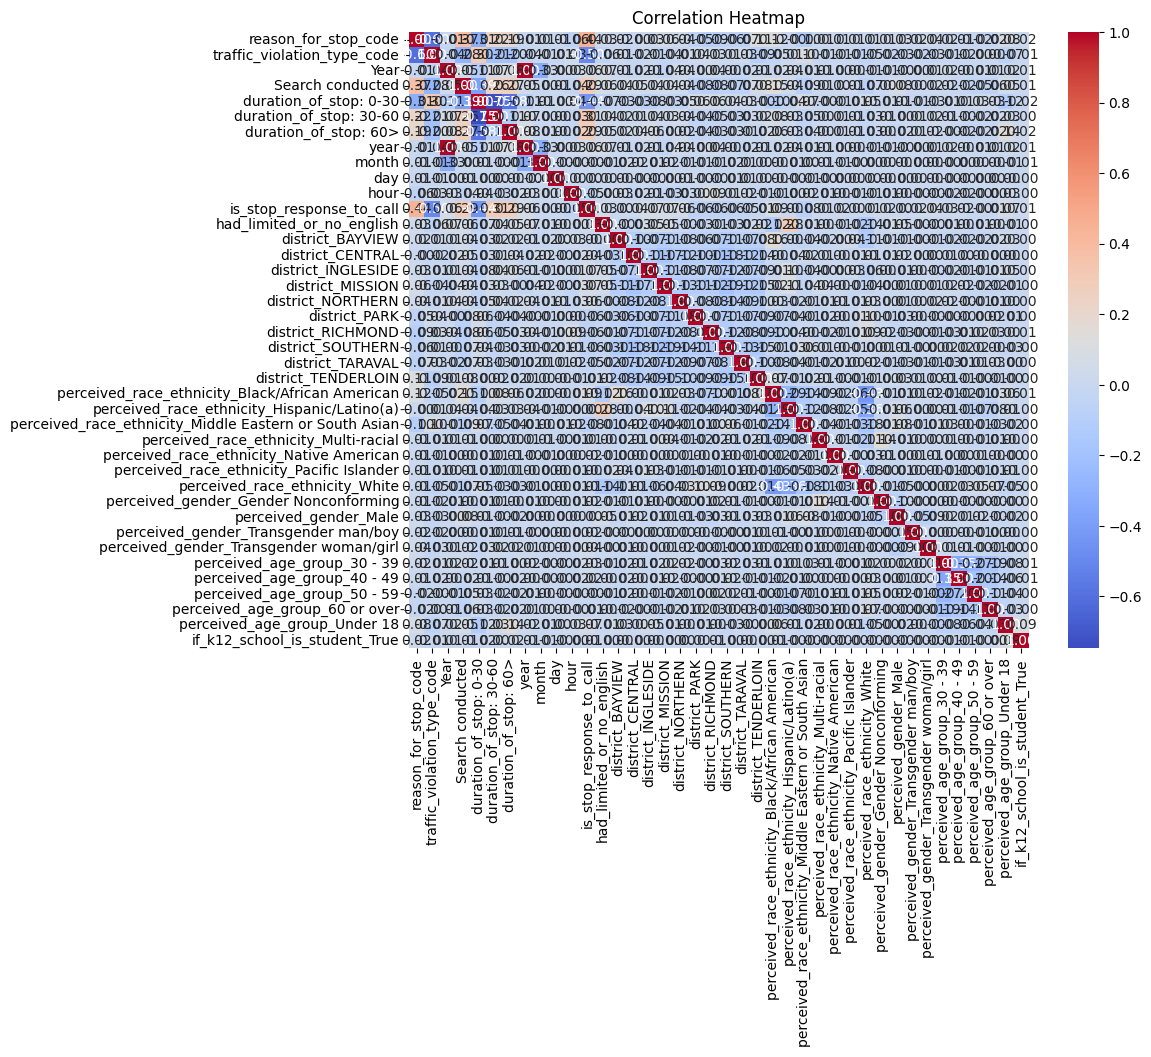

In [ ]:
# compute the correlation matrix
correlation_matrix = traffic_stop_copy.corr()

# generate a heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt=".2f",   
            cmap='coolwarm', 
            cbar=True)   
plt.title('Correlation Heatmap')  
plt.show()  

### Interpreting Corr Matrix:

In [ ]:
# printing out the most correlated pairs because the heatmap is too dense

sorted_corr = correlation_matrix.unstack().sort_values(ascending=False)

# exclude the correlations of variables with themselves
sorted_corr = sorted_corr[sorted_corr != 1.0]


print("Most correlated pairs:")
print(sorted_corr.head())

Most correlated pairs:
reason_for_stop_code      is_stop_response_to_call    0.441078
is_stop_response_to_call  reason_for_stop_code        0.441078
Search conducted          reason_for_stop_code        0.367712
reason_for_stop_code      Search conducted            0.367712
duration_of_stop: 30-60   is_stop_response_to_call    0.305896
dtype: float64


Which features are most correlated with 'Search conducted'? : 

In [ ]:
# filter sorted_corr to include correlations involving "Search conducted"
search_conducted_correlation = sorted_corr[sorted_corr.index.get_level_values(0) == 'Search conducted']

print("Most correlated pairs with 'Search conducted':")
print(search_conducted_correlation.head(10))

Most correlated pairs with 'Search conducted':
Search conducted  reason_for_stop_code                               0.367712
                  is_stop_response_to_call                           0.291669
                  duration_of_stop: 60>                              0.268361
                  duration_of_stop: 30-60                            0.256019
                  perceived_race_ethnicity_Black/African American    0.151394
                  district_TENDERLOIN                                0.078832
                  perceived_gender_Male                              0.075276
                  had_limited_or_no_english                          0.063574
                  perceived_age_group_Under 18                       0.052633
                  year                                               0.048162
dtype: float64


## Predictive Modeling:

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

traffic_train, traffic_test = train_test_split(traffic_stop_copy, test_size=0.3, random_state=88)
traffic_train.shape, traffic_test.shape

((152690, 40), (65439, 40))

In [ ]:
#Baseline Model
#Searches conducted in training set

stop_false = np.sum(traffic_train['Search conducted'] == 0)  # not stopped
stop_true = np.sum(traffic_train['Search conducted'] == 1)   # stopped

print(pd.Series({'0': stop_false, '1': stop_true}))

0    120586
1     32104
dtype: int64


In [ ]:
# accuracy of baseline model based on training data:
ACC = stop_false/(stop_false + stop_true)
ACC

0.7897439256008907

In [ ]:
# accuracy of baseline on testing:
traffic_false_test = np.sum(traffic_test['Search conducted'] == 0)
traffic_true_test = np.sum(traffic_test['Search conducted'] == 1)
ACC_test = traffic_false_test/(traffic_false_test + traffic_true_test)
ACC_test

0.794740139672061

# OLS

In [ ]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import statsmodels.api as sm

# choose the features to be used
cols = ['duration_of_stop: 0-30', 'duration_of_stop: 30-60', 'duration_of_stop: 60>', 'Year', 
    'traffic_violation_type_code', 'reason_for_stop_code', 'year', 
    'month', 'day', 'hour', 'is_stop_response_to_call', 'had_limited_or_no_english', 
    'district_BAYVIEW', 'district_CENTRAL', 'district_INGLESIDE', 
    'district_MISSION', 'district_NORTHERN', 'district_PARK', 
    'district_RICHMOND', 'district_SOUTHERN', 'district_TARAVAL', 'district_TENDERLOIN', 
    'perceived_race_ethnicity_Black/African American', 'perceived_race_ethnicity_Hispanic/Latino(a)', 
    'perceived_race_ethnicity_Middle Eastern or South Asian', 'perceived_race_ethnicity_Multi-racial', 
    'perceived_race_ethnicity_Native American', 'perceived_race_ethnicity_Pacific Islander', 
    'perceived_race_ethnicity_White', 'perceived_gender_Gender Nonconforming', 'perceived_gender_Male', 
    'perceived_gender_Transgender man/boy', 'perceived_gender_Transgender woman/girl', 
    'perceived_age_group_30 - 39', 'perceived_age_group_40 - 49', 'perceived_age_group_50 - 59', 
    'perceived_age_group_60 or over', 'perceived_age_group_Under 18', 'if_k12_school_is_student_True']
X_train = traffic_train[cols]
y_train = traffic_train['Search conducted']

# add an intercept since the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

print(X_train[:5])

        const  duration_of_stop: 0-30  duration_of_stop: 30-60  \
145018    1.0                       1                        0   
85998     1.0                       1                        0   
33776     1.0                       1                        0   
105916    1.0                       1                        0   
32155     1.0                       1                        0   

        duration_of_stop: 60>  Year  traffic_violation_type_code  \
145018                      0  2018                          3.0   
85998                       0  2019                          1.0   
33776                       0  2019                          0.0   
105916                      0  2019                          0.0   
32155                       0  2020                          0.0   

        reason_for_stop_code    year  month   day  ...  \
145018                   1.0  2018.0    8.0  15.0  ...   
85998                    1.0  2019.0   10.0  14.0  ...   
33776               

In [ ]:
# Fit the data to the model
olsmodel1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:       Search conducted   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1420.
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        03:45:23   Log-Likelihood:                -57003.
No. Observations:              152690   AIC:                         1.141e+05
Df Residuals:                  152652   BIC:                         1.145e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns): #to nicely summarize our features
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

VIF(traffic_train, cols)

/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


duration_of_stop: 0-30                                         inf
duration_of_stop: 30-60                                        inf
duration_of_stop: 60>                                          inf
Year                                                           inf
traffic_violation_type_code                               1.872645
reason_for_stop_code                                      1.732798
year                                                           inf
month                                                     1.124385
day                                                       1.000497
hour                                                      1.023788
is_stop_response_to_call                                  1.601506
had_limited_or_no_english                                 1.118035
district_BAYVIEW                                          3.570416
district_CENTRAL                                          6.525149
district_INGLESIDE                                        3.72

# Logistic Regression

In [ ]:
import statsmodels.formula.api as smf

#dropped 'Year' variable, redundant variable that caused the code to error out
model1 = smf.logit(formula=(
    'Q("Search conducted") ~ Q("duration_of_stop: 0-30") + Q("duration_of_stop: 30-60") + Q("duration_of_stop: 60>") + '
    'Q("traffic_violation_type_code") + Q("reason_for_stop_code") + '
    'Q("year") + Q("month") + Q("day") + Q("hour") + Q("is_stop_response_to_call") + Q("had_limited_or_no_english") + Q("district_BAYVIEW") + Q("district_CENTRAL") + Q("district_INGLESIDE") + '
    'Q("district_MISSION") + Q("district_NORTHERN") + Q("district_PARK") + '
    'Q("district_RICHMOND") + Q("district_SOUTHERN") + Q("district_TARAVAL") + Q("district_TENDERLOIN") + '
    'Q("perceived_race_ethnicity_Black/African American") + Q("perceived_race_ethnicity_Hispanic/Latino(a)") + '
    'Q("perceived_race_ethnicity_Middle Eastern or South Asian") + Q("perceived_race_ethnicity_Multi-racial") + '
    'Q("perceived_race_ethnicity_Native American") + Q("perceived_race_ethnicity_Pacific Islander") + '
    'Q("perceived_race_ethnicity_White") + Q("perceived_gender_Gender Nonconforming") + Q("perceived_gender_Male") + '
    'Q("perceived_gender_Transgender man/boy") + Q("perceived_gender_Transgender woman/girl") + '
    'Q("perceived_age_group_30 - 39") + Q("perceived_age_group_40 - 49") + Q("perceived_age_group_50 - 59") + '
    'Q("perceived_age_group_60 or over") + Q("perceived_age_group_Under 18") + Q("if_k12_school_is_student_True") '
), data=traffic_train).fit()

print(model1.summary())


Optimization terminated successfully.
         Current function value: 0.387556
         Iterations 8
                             Logit Regression Results                            
Dep. Variable:     Q("Search conducted")   No. Observations:               152690
Model:                             Logit   Df Residuals:                   152652
Method:                              MLE   Df Model:                           37
Date:                   Thu, 09 May 2024   Pseudo R-squ.:                  0.2464
Time:                           03:46:28   Log-Likelihood:                -59176.
converged:                          True   LL-Null:                       -78528.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------

## VIF

In [ ]:
cols = ['duration_of_stop: 0-30', 'duration_of_stop: 30-60', 'duration_of_stop: 60>', 'Year', 
    'traffic_violation_type_code', 'reason_for_stop_code', 'year', 
    'month', 'day', 'hour', 'is_stop_response_to_call', 'had_limited_or_no_english', 
    'district_BAYVIEW', 'district_CENTRAL', 'district_INGLESIDE', 
    'district_MISSION', 'district_NORTHERN', 'district_PARK', 
    'district_RICHMOND', 'district_SOUTHERN', 'district_TARAVAL', 'district_TENDERLOIN', 
    'perceived_race_ethnicity_Black/African American', 'perceived_race_ethnicity_Hispanic/Latino(a)', 
    'perceived_race_ethnicity_Middle Eastern or South Asian', 'perceived_race_ethnicity_Multi-racial', 
    'perceived_race_ethnicity_Native American', 'perceived_race_ethnicity_Pacific Islander', 
    'perceived_race_ethnicity_White', 'perceived_gender_Gender Nonconforming', 'perceived_gender_Male', 
    'perceived_gender_Transgender man/boy', 'perceived_gender_Transgender woman/girl', 
    'perceived_age_group_30 - 39', 'perceived_age_group_40 - 49', 'perceived_age_group_50 - 59', 
    'perceived_age_group_60 or over', 'perceived_age_group_Under 18', 'if_k12_school_is_student_True']
VIF(traffic_train, cols)

/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


duration_of_stop: 0-30                                         inf
duration_of_stop: 30-60                                        inf
duration_of_stop: 60>                                          inf
Year                                                           inf
traffic_violation_type_code                               1.872645
reason_for_stop_code                                      1.732798
year                                                           inf
month                                                     1.124385
day                                                       1.000497
hour                                                      1.023788
is_stop_response_to_call                                  1.601506
had_limited_or_no_english                                 1.118035
district_BAYVIEW                                          3.570416
district_CENTRAL                                          6.525149
district_INGLESIDE                                        3.72

### Logistic Model 1 OSR2

In [ ]:
#OSR2

def OSR2(model, df_train, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST

print(OSR2(model1, traffic_train, traffic_test, 'Search conducted'))

0.2389413661662233


## Second Logistic Regression Model, accounting for variables from VIF

In [ ]:
# dropping districts with high VIF vals: year + Q("district_SOUTHERN"), + Q("district_CENTRAL"), district_MISSION
# also dropped all duration_of_stop columns because duration vals have inf VIF values 

# we anticipate that this will lower OSR2 signficantly because duration of stops were highly correlated with Search conducted during our EDA

model2 = smf.logit(formula=(
    'Q("Search conducted") ~  + '
    'Q("traffic_violation_type_code") + Q("reason_for_stop_code") + Q("day") + Q("hour") + Q("had_limited_or_no_english") + '
    'Q("district_BAYVIEW") + Q("district_INGLESIDE") + Q("district_NORTHERN") + Q("district_PARK") + '
    'Q("district_RICHMOND") + Q("district_TARAVAL") + Q("district_TENDERLOIN") + '
    'Q("perceived_race_ethnicity_Black/African American") + Q("perceived_race_ethnicity_Hispanic/Latino(a)") + '
    'Q("perceived_race_ethnicity_Middle Eastern or South Asian") + Q("perceived_race_ethnicity_Multi-racial") + '
    'Q("perceived_race_ethnicity_Native American") + Q("perceived_race_ethnicity_Pacific Islander") + '
    'Q("perceived_race_ethnicity_White") + Q("perceived_gender_Gender Nonconforming") + Q("perceived_gender_Male") + '
    'Q("perceived_gender_Transgender man/boy") + Q("perceived_gender_Transgender woman/girl") + '
    'Q("perceived_age_group_30 - 39") + Q("perceived_age_group_40 - 49") + Q("perceived_age_group_50 - 59") + '
    'Q("perceived_age_group_60 or over") + Q("perceived_age_group_Under 18")'
), data=traffic_train).fit()

print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.423653
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     Q("Search conducted")   No. Observations:               152690
Model:                             Logit   Df Residuals:                   152661
Method:                              MLE   Df Model:                           28
Date:                   Thu, 09 May 2024   Pseudo R-squ.:                  0.1762
Time:                           04:25:34   Log-Likelihood:                -64688.
converged:                          True   LL-Null:                       -78528.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------

### Logistic Model 2 OSR2

In [ ]:
# dropping all duration columns results in a much lower OSR2
# looks like keeping duration in is helpful
print(OSR2(model2, traffic_train, traffic_test, 'Search conducted'))

0.17287381455013107


In [ ]:
#testing this
y_test = traffic_test['Search conducted']
y_prob = model2.predict(traffic_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)
y_pred

139778    0
238058    0
139796    0
104469    0
17743     0
         ..
220087    0
1018      0
104450    0
221992    1
98254     0
Length: 65439, dtype: int64

### Confusion Matrix for Logistic Model 2

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[49943  2064]
 [10660  2772]]


Second LogReg model has a very low TPR rate of 20%:

In [ ]:
logit_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
logit_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
logit_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print(logit_acc) # still higher than baseline model by a bit
print(logit_tpr) # really bad TPR
print(logit_fpr)

0.8055593759073335
0.2063728409767719
0.03968696521622089


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = traffic_train[cols]
y_train = traffic_train['Search conducted']

rf = RandomForestClassifier(n_estimators=200, max_depth=10, bootstrap=True, random_state=42, max_features='sqrt')
rf.fit(X_train, y_train)
training_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train, training_pred)
print(accuracy)

0.8380575021284956


In [ ]:
X_test = traffic_test[cols]
y_test = traffic_test['Search conducted']
test_pred = rf.predict(X_test)

In [ ]:
cm_rf = confusion_matrix(y_test, test_pred)
rf_acc = (cm_rf.ravel()[0]+cm_rf.ravel()[3])/sum(cm_rf.ravel())
rf_tpr = cm_rf.ravel()[3]/(cm_rf.ravel()[3]+cm_rf.ravel()[2])
rf_fpr = cm_rf.ravel()[1]/(cm_rf.ravel()[1]+cm_rf.ravel()[0])

#seems like this model does better than logistic regression
print(rf_acc)
print(rf_tpr) # higher than logit
print(rf_fpr) # higher than logit by 0.004

0.8289857730099788
0.44937462775461584
0.07297094621877824


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

grid_values = {
    'max_features': np.linspace(1, 18, 18, dtype='int'),  
    'min_samples_leaf': [5],                             
    'n_estimators': [500],                               
    'random_state': [88]                                 
}
tic = time.time()

rf_classifier = RandomForestClassifier()

cv = KFold(n_splits=5, random_state=333, shuffle=True)

rf_cv = GridSearchCV(estimator=rf_classifier, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=2)



In [ ]:
#sample a subset of our data
subset_fraction = 0.1  # e.g., 10% of the data
subset_index = np.random.choice(X_train.index, int(len(X_train)*subset_fraction), replace=False)
X_train_subset = X_train.loc[subset_index]
y_train_subset = y_train.loc[subset_index]

#running GridSearchCV on this subset
rf_cv.fit(X_train_subset, y_train_subset)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.0s
[CV] END max_features=2, min_samples_leaf=5, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='accuracy', verbose=2)

Cross-validated Accuracy: 0.82514


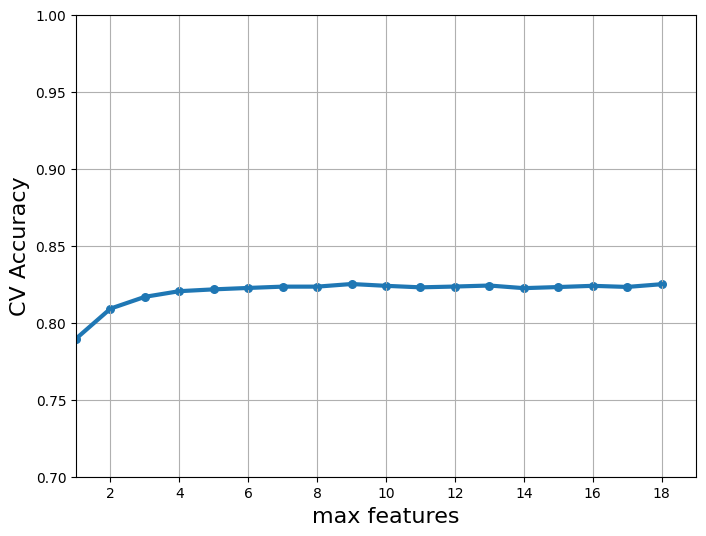

In [ ]:
#plotting our cv accuracy
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.7, 1.0]) 

print('Cross-validated Accuracy:', round(rf_cv.best_score_, 5))


In [ ]:
#predicting using our best model
best_rf_model = rf_cv.best_estimator_
y_pred = best_rf_model.predict(X_test)

#calculating accuarcy with our best model
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', round(test_accuracy, 5))


Test Accuracy: 0.82549


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ef5568d-908f-4c85-9ae4-ce5e1710465e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>